In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
#load tsv file
tsv_file = 'taxonomy_annotation.tsv'
#read tsv file
csv_table = pd.read_table(tsv_file,sep='\t')
#convert tsv to csv
csv_table.to_csv('taxonomy_annotation.tsv', index=False)
print('convert to csv')

convert to csv


In [80]:
#read file into variable biome_data
biome_data = pd.read_csv(tsv_file)


In [81]:
biome_data.head()

,Sample,Taxon,Rank,Counts,Percent
0,611894955_NA0019790070_4_mouth,root,root,101048,100.000000
1,611894955_NA0019790070_4_mouth,Bacteria,superkingdom,101048,100.000000
2,611894955_NA0019790070_4_mouth,Simonsiella,genus,4,0.003959
3,611894955_NA0019790070_4_mouth,Simonsiella muelleri,species,4,0.003959
4,611894955_NA0019790070_4_mouth,Spirochaetales,order,56,0.055419


In [82]:
print(biome_data.columns)

Index(['Sample', 'Taxon', 'Rank', 'Counts', 'Percent'], dtype='object')


In [83]:

# Define a dictionary with the old and new names
replacement_dict = {'611894955_NA0019790070_4_mouth':'S1', 
                    '611895111_NA0019790065_4_mouth': 'S2', 
                    '651895069_NA0019790062_4_mouth': 'S3',
                    '651895168_NA0019790053_4_mouth': 'S4', 
                    '681895159_NA0019790071_4_mouth': 'S5', 
                    '691895051_NA0019790054_4_mouth': 'S6',
                    '691895114_NA0019790050_4_mouth': 'S7',
                    '701894994_NA0019790058_4_mouth':'S8', 
                    '701895000_NA0019790607_4_mouth': 'S9',
                    '711894952_NA0019790626_4_mouth':'S10',
                    '721894931_NA0019790618_4_mouth': 'S11',
                    '851895003_NA0019790624_4_mouth':'S12',
                    '851895156_NA0019790647_4_mouth':'S13',
                    '871894913_NA0019790605_4_mouth':'S14',
                    '871895021_NA0019790609_4_mouth':'S15',
                    '871895048_NA0019790610_4_mouth': 'S16', 
                    '871895057_NA0019790619_4_mouth': 'S17',
                    '871895129_NA0019790634_4_mouth': 'S18',
                    '881894910_NA0019790601_4_mouth': 'S19',
                    '881894997_NA0019790602_4_mouth': 'S20'}

# Use the replace method to replace values in the specified column
biome_data['Sample'] = biome_data['Sample'].replace(replacement_dict)

# Print the updated DataFrame
print(biome_data.head())

  Sample                 Taxon          Rank  Counts     Percent
0     S1                  root          root  101048  100.000000
1     S1              Bacteria  superkingdom  101048  100.000000
2     S1           Simonsiella         genus       4    0.003959
3     S1  Simonsiella muelleri       species       4    0.003959
4     S1        Spirochaetales         order      56    0.055419


In [147]:
#new data frame with family, sample and percent only

condition = 'family'
newbiome_data=biome_data[biome_data['Rank']==condition]

# Assuming original_dataframe is your larger DataFrame
selected_columns_df = newbiome_data[['Sample', 'Rank', 'Percent']]

# Display the new DataFrame
print(selected_columns_df)
newbiome_data.head()

     Sample    Rank    Percent
9        S1  family   2.887737
17       S1  family   6.520663
43       S1  family   4.223735
44       S1  family  31.410815
56       S1  family   0.189019
...     ...     ...        ...
4950    S20  family   0.478562
4952    S20  family   0.042625
4953    S20  family   0.003875
4960    S20  family   0.191812
4962    S20  family   0.362312

[629 rows x 3 columns]


,Sample,Taxon,Rank,Counts,Percent
9,S1,Neisseriaceae,family,2918,2.887737
17,S1,Pasteurellaceae,family,6589,6.520663
43,S1,Micrococcaceae,family,4268,4.223735
44,S1,Streptococcaceae,family,31740,31.410815
56,S1,Corynebacteriaceae,family,191,0.189019


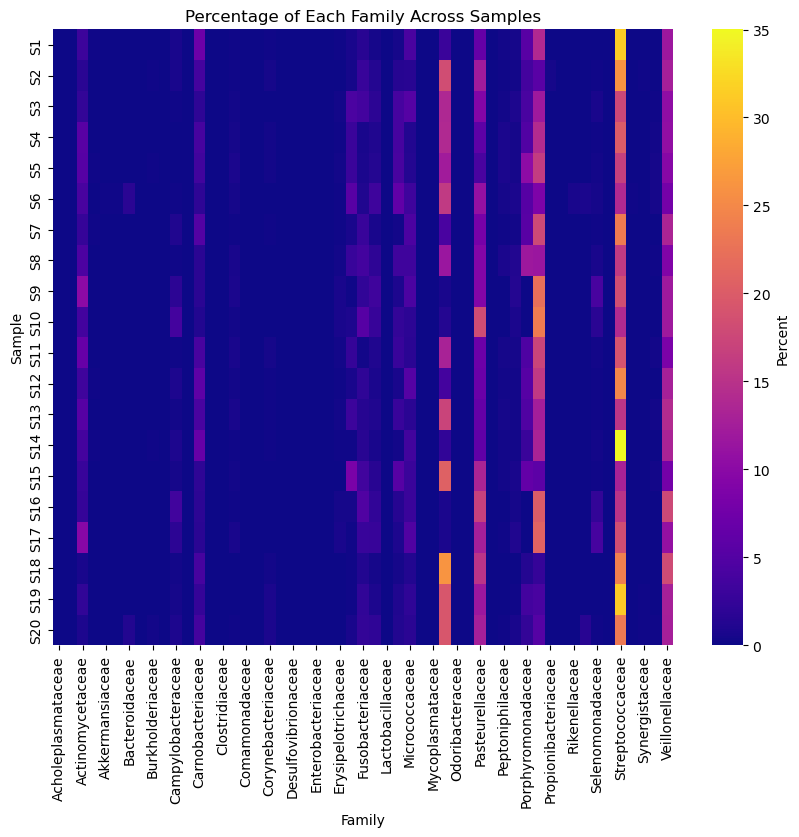

In [158]:
#create pivot table
heatmap_data = pd.pivot_table(newbiome_data, values='Percent', index='Sample',
                              columns='Taxon', aggfunc='sum', fill_value=0)
#define sample order
sample_order=['S1', "S2", 'S3','S4','S5','S6',
             'S7','S8','S9', 'S10', 'S11', 'S12', 'S13',
             'S14', 'S15', 'S16', 'S17', 'S18', 'S19','S20']
#set font size
font_size= 4
annot_kws = {'size': font_size}
#create a heatmap
plt.figure(figsize=(10, 8))
plt.title('Percentage of Each Family Across Samples')
sns.heatmap(data=heatmap_data, annot=False, cmap='plasma', cbar_kws={'label': 'Percent'}, yticklabels=sample_order)
plt.xlabel('Family')
plt.ylabel('Sample')
plt.show()